# Solving (Ordinary Differential Equations) ODE

For today's seesion we take example from Chemical Kinetic, reaction that are coupled differential equations with some initial conditions. We assume to have three species: $x=[X],y=[Y],z=[Z]$ with initail conditions set to be $x=1, y=z=0$

$\frac{dx}{dt}= -0.04 x +10^4yz$  
$\frac{dy}{dt}= 0.04 x -10^4yz-3\times 10^7 y^2$  
$\frac{dz}{dt}= 3\times 10^7 y^2$  


Runge-Kutta method

In [10]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

In [11]:
def rate_equations(t,y):
    x,y,z = y
    dxdt = -0.04*x+(1.e4)*y*z
    dydt = 0.04*x-(1.e4)*y*z-3.e7*y**2
    dzdt = 3.e7*y**2
    return dxdt, dydt, dzdt

t0, tf = 0, 500
y0 = 1, 0, 0
soln = solve_ivp(rate_equations, (t0,tf), y0, method='Radau')
#print(soln)

# Plot the results

Often times it is advisable to visualize your results (outputs) to make sense of what is happening.


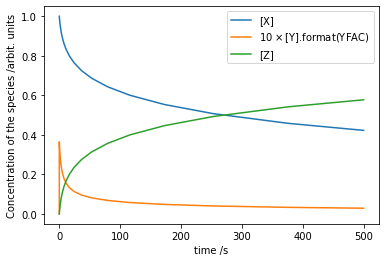

In [13]:
# scale y by 10, 10**YFAC
YFAC =4

plt.plot(soln.t, soln.y[0], label='[X]')
plt.plot(soln.t, 10**YFAC*soln.y[1], label=r'$10^{}\times$[Y].format(YFAC)')
plt.plot(soln.t, soln.y[2], label='[Z]')
plt.xlabel('time /s')
plt.ylabel('Concentration of the species /arbit. units')
plt.legend()